<a href="https://colab.research.google.com/github/taerd/DSIntro/blob/master/Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
titanic_data=pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# нахождение пропущеных значений
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# выбираем данные для обучения (axis=1 по столбцам)
X=titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
y=titanic_data.Survived

In [ ]:
# избежание номинативных переменных (One-hot encoding)
X = pd.get_dummies(X)

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
# Заполнение пропущенных значений в поле age медианным значением возраста
X=X.fillna({'Age' : X.Age.median()})

In [ ]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# параметры дерева
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# список атрибутов дерева
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_sample

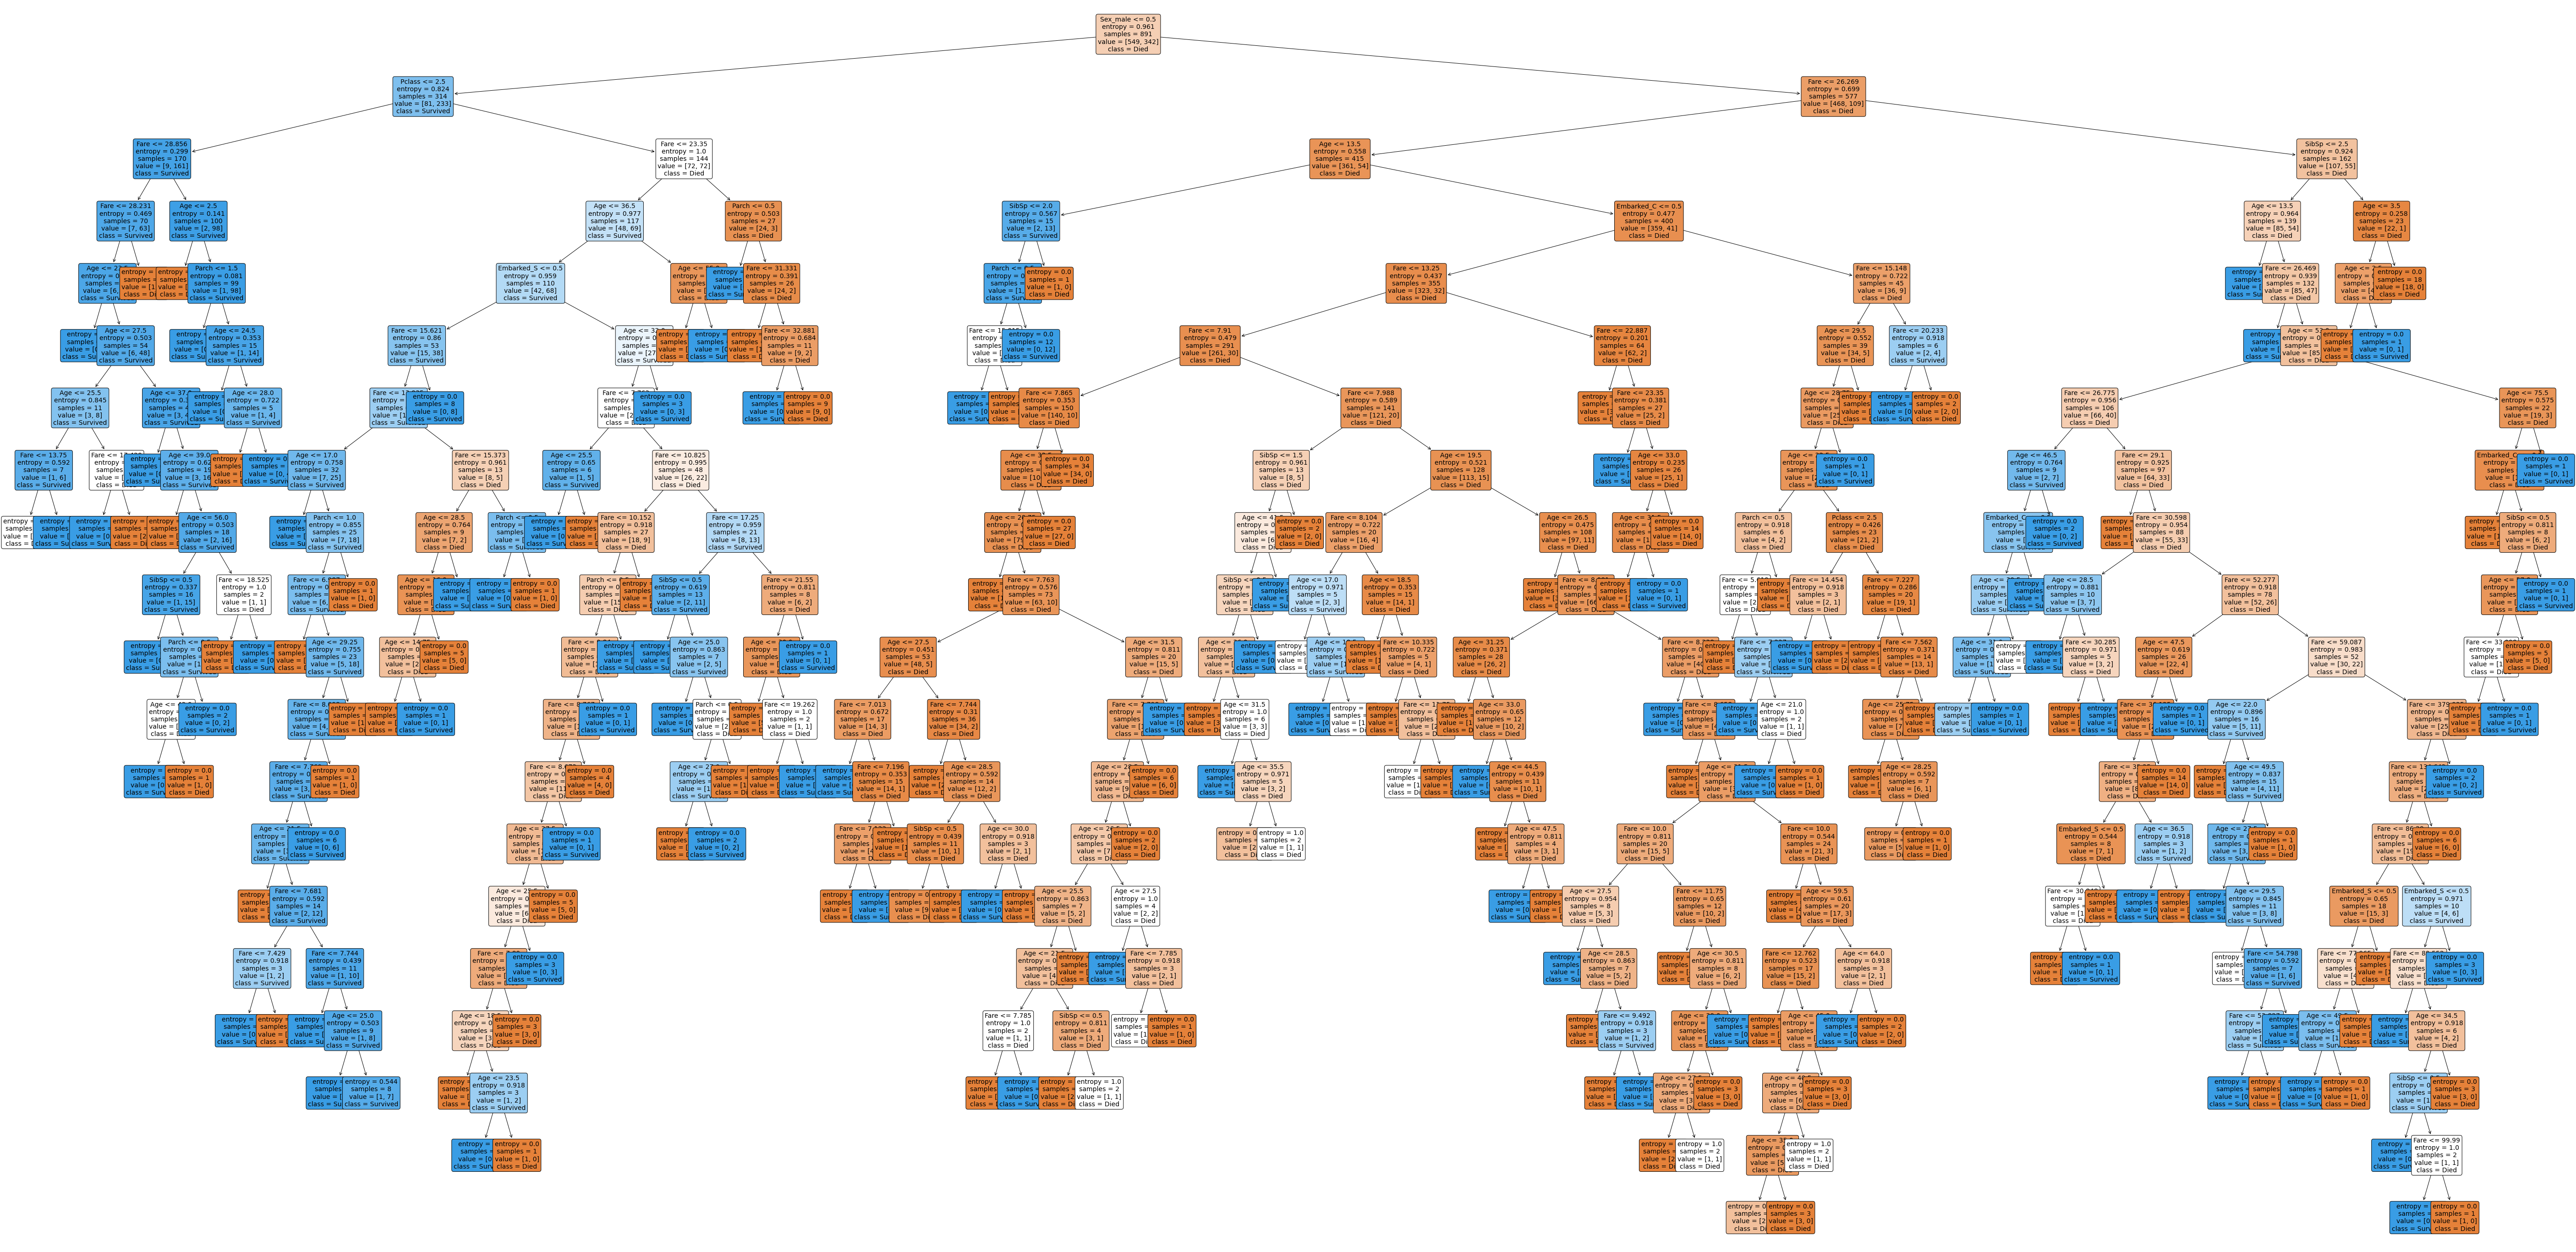

In [ ]:
# Визуализация
plt.figure(figsize=(100, 50))
tree.plot_tree(clf, 
               feature_names=list(X), 
               class_names=['Died', 'Survived'], 
               filled=True,
               rounded=True,
               fontsize = 14)
plt.show()

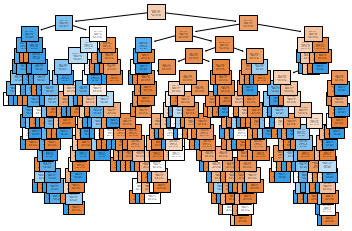

In [ ]:
tree.plot_tree(clf,feature_names=list(X),class_names=['Survived','Died'],filled=True,fontsize=1);

In [ ]:
# Подбор параметров за счет тестирования модели на другой выборке(неверное суждение)
# Разбитие нашей выборки на тестовую и train части
from sklearn.model_selection import train_test_split

In [ ]:
# 33 процента из всей выборки будет 'тестом'
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.33, random_state = 42)

In [ ]:
X_train.shape

(596, 10)

In [ ]:
X_test.shape

(295, 10)

In [ ]:
# Валидация (очень упрощенная версия)
# Сравнение предсказанных ответов на train и на test
clf.score(X,y)

0.9797979797979798

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf.score(X_train,y_train)

0.9798657718120806

In [ ]:
clf.score(X_test,y_test)

0.7593220338983051

In [ ]:
# процент упал, изза переобучения на конкретной выборке
# подгон параметра max_depth
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf.score(X_train,y_train)

0.8238255033557047

In [ ]:
clf.score(X_test,y_test)

0.8203389830508474

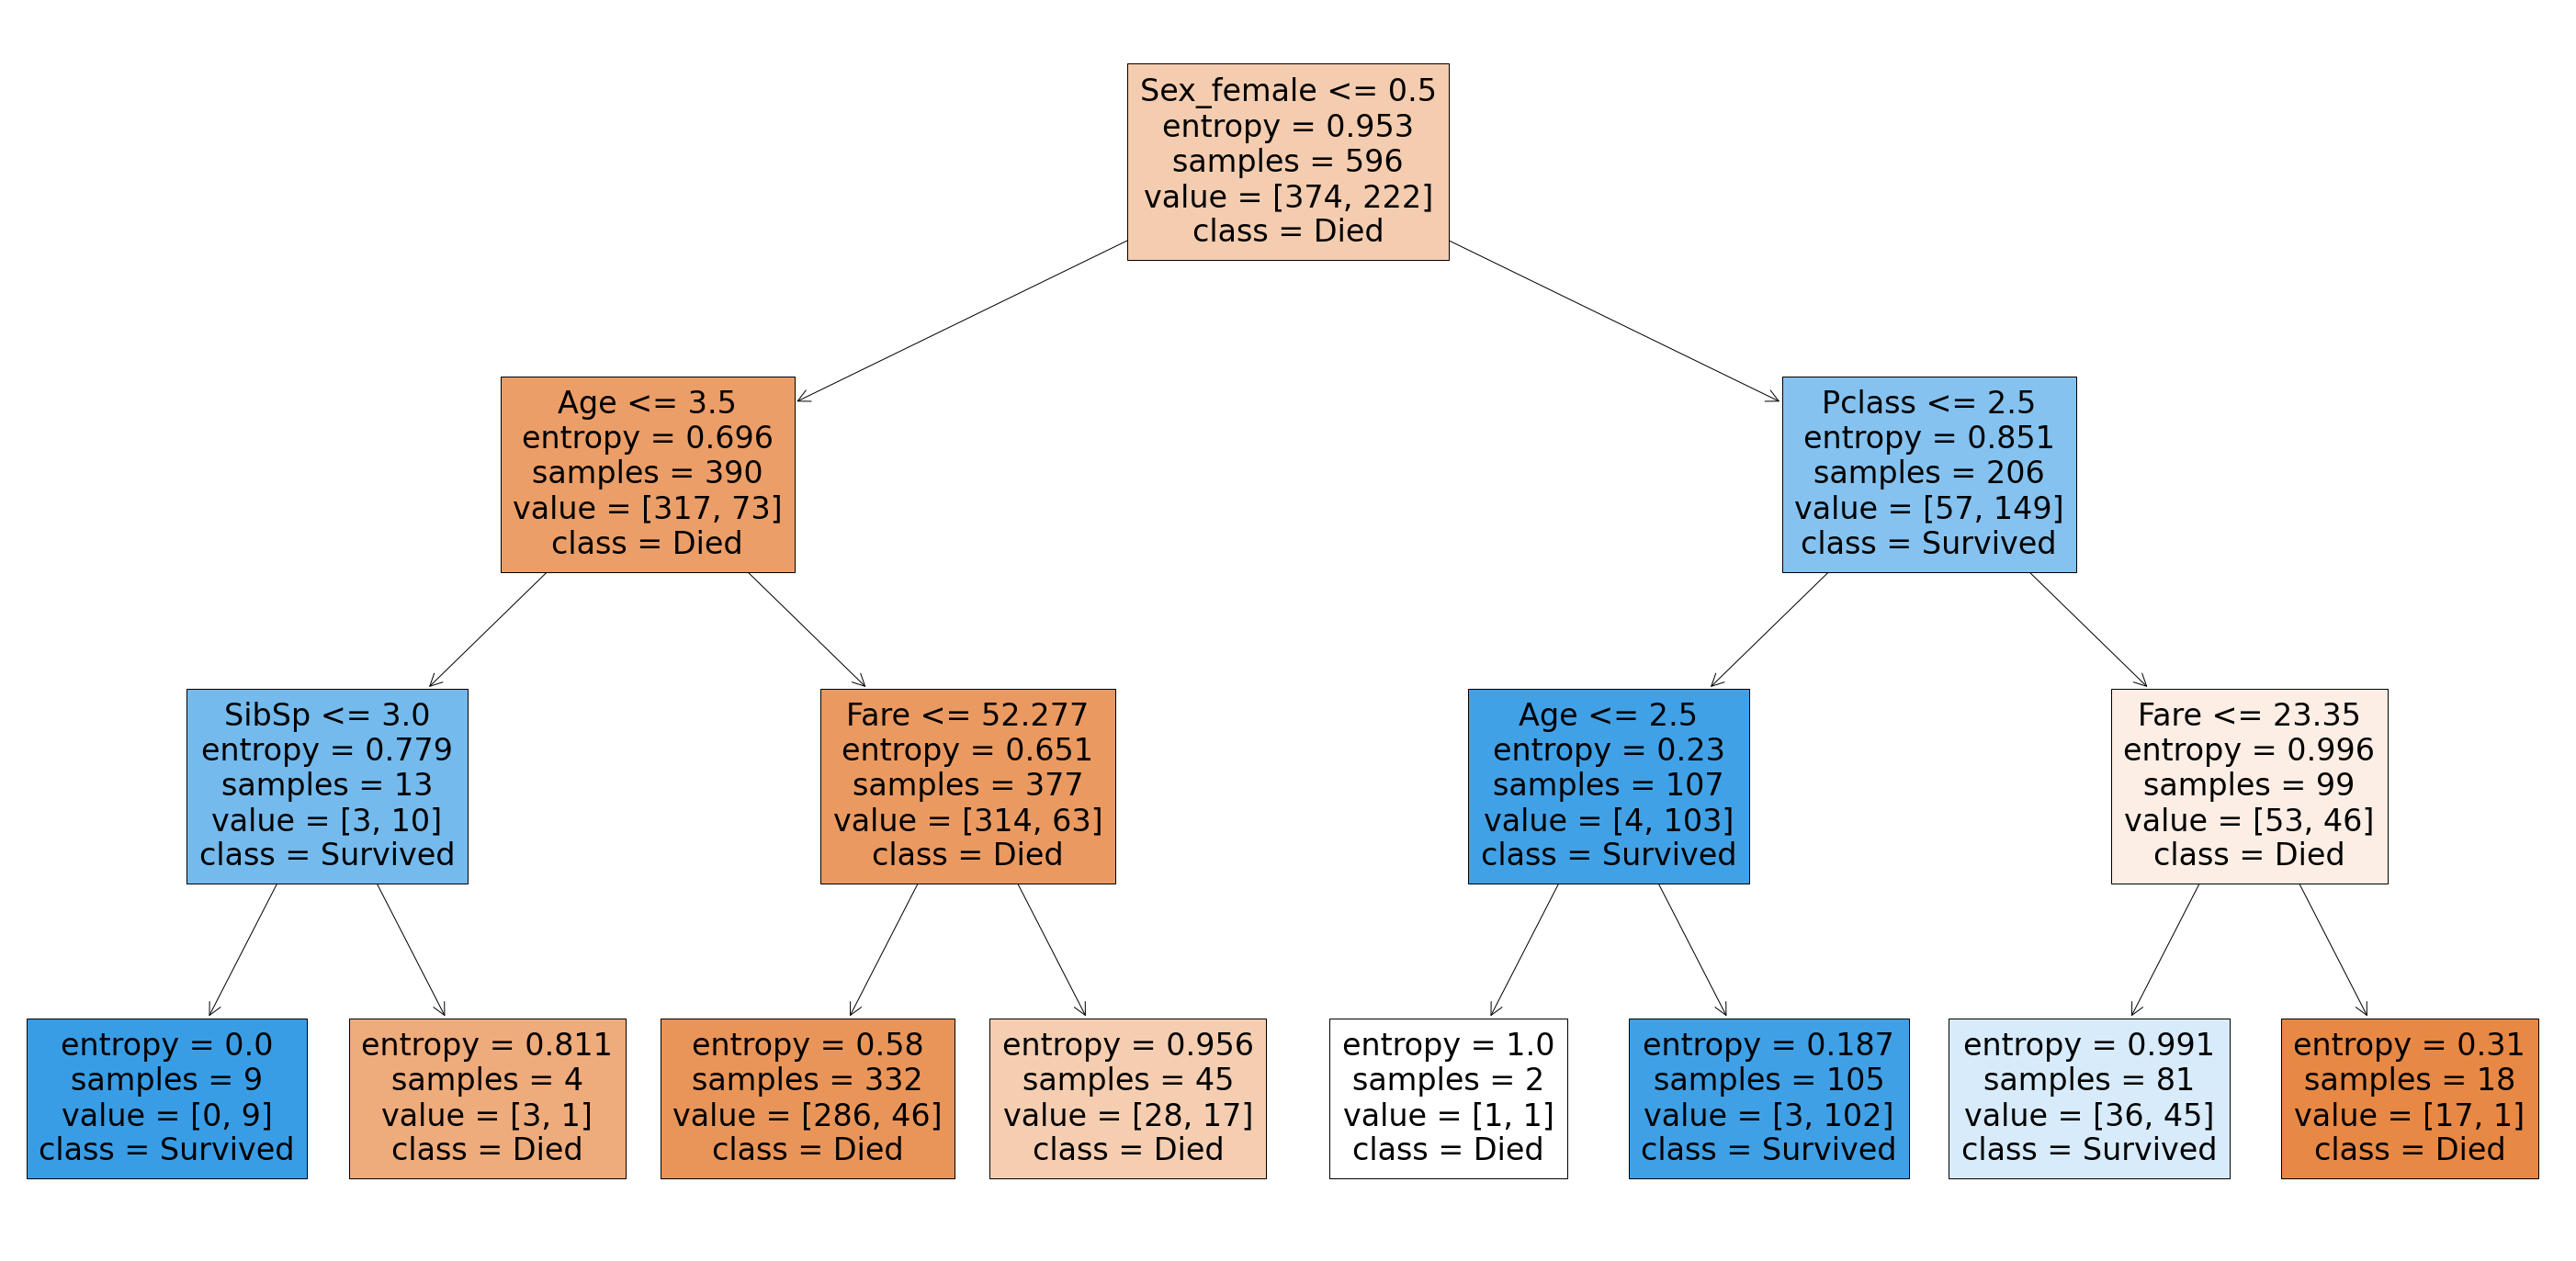

In [ ]:
# Визуализация
plt.figure(figsize=(50,25))
tree.plot_tree(clf,feature_names=list(X_train),class_names=['Died','Survived'],filled=True)
plt.show()

In [ ]:
# Еще проверки
max_depth_values = range(1 , 100)

In [ ]:
scores_data = pd.DataFrame()

In [ ]:
# пытаемся определить наилучшие параметры max_depth
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score' : [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [ ]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [ ]:
# изменение формата df (из двух колонок делаем одну, но увеличиваем количество записей)
scores_data_long = pd.melt(scores_data,
                           id_vars = ['max_depth'], 
                           value_vars = ['train_score','test_score'],
                           var_name = 'set_type',
                           value_name = 'score')

In [ ]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

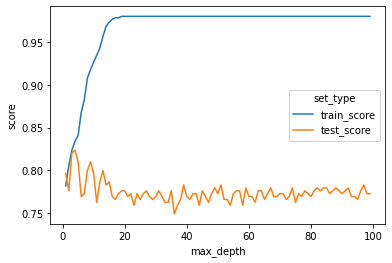

In [ ]:
#отрисовка графиков hue - цвет
sns.lineplot(x='max_depth',y='score',hue='set_type',data=scores_data_long)

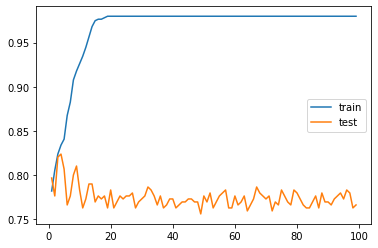

In [ ]:
# другой вариант записи поиска подходящего параметра
max_depth_values = range(1, 100)
train_val = []
test_val = []
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_val.append(clf.score(X_train, y_train))
    test_val.append(clf.score(X_test, y_test))
ax = sns.lineplot(x=max_depth_values, y=train_val, label='train')
ax = sns.lineplot(x=max_depth_values, y=test_val, label='test')

In [ ]:
# решаем проблемму переобучения используя cross-validation
from sklearn.model_selection import cross_val_score 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.33, random_state = 42)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [ ]:
# Кроссвалидация на train множестве с fold=5( на 5 частей разобьется train set)
cross_val_score(clf,X_train,y_train,cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [ ]:
# усредняем значения кроссвалидации
cross_val_score(clf,X_train,y_train,cv=5).mean()

0.7886274509803922

In [ ]:
scores_data = pd.DataFrame()

In [ ]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    
    mean_cross_val_score=cross_val_score(clf,X_train,y_train,cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score' : [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [ ]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.800392


In [ ]:
scores_data_long = pd.melt(scores_data,
                           id_vars = ['max_depth'], 
                           value_vars = ['train_score','test_score','cross_val_score'],
                           var_name = 'set_type',
                           value_name = 'score')

In [ ]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [ ]:
scores_data_long.query("set_type =='cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
203,6,cross_val_score,0.805434
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.805406
206,9,cross_val_score,0.795322
207,10,cross_val_score,0.808754


<AxesSubplot:xlabel='max_depth', ylabel='score'>

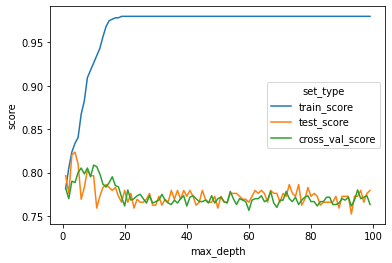

In [ ]:
sns.lineplot(x='max_depth',y='score',hue='set_type',data=scores_data_long)

In [ ]:
best_clf= tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)

In [ ]:
best_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [ ]:
best_clf.score(X_test,y_test)

0.7898305084745763

In [ ]:
# using GridSearch to find best parameters for cross-validations
# повторяет логику при подборе параметров описанную выше

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf= tree.DecisionTreeClassifier()

In [ ]:
clf?

In [ ]:
parametrs = {'criterion' : ['gini','entropy'], 'max_depth' : range(1,30)}

In [ ]:
grid_search_cv_clf =GridSearchCV(clf,parametrs , cv = 5)

In [ ]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [ ]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_

In [ ]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=8)

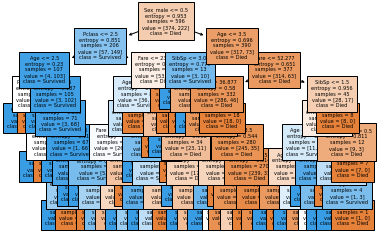

In [ ]:
tree.plot_tree(best_clf,
               feature_names=list(X_train),
               class_names=['Died','Survived'],
               filled=True,
               fontsize = 5);

In [ ]:
# при дисбалансе классов accuracy не дает представление о точности модели
best_clf.score(X_test,y_test)

0.8033898305084746

In [ ]:
# подсчет метрик
from sklearn.metrics import precision_score , recall_score

In [ ]:
predictions = best_clf.predict(X_test)

In [ ]:
pr_score = precision_score(y_test,predictions)

In [ ]:
rec_score = recall_score(y_test, predictions)

In [ ]:
pr_score

0.8369565217391305

In [ ]:
rec_score

0.6416666666666667

In [ ]:
F = pr_score*rec_score/(pr_score+rec_score)

In [ ]:
F

0.36320754716981135

In [ ]:
predictions

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [ ]:
# узнаем вероятности соотнесения к некоторым классам

In [ ]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [ ]:
y_predicted_prob

array([[0.8852459 , 0.1147541 ],
       [0.61538462, 0.38461538],
       [0.8852459 , 0.1147541 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.8852459 , 0.1147541 ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.90196078, 0.09803922],
       [1.        , 0.        ],
       [0.8852459 , 0.1147541 ],
       [0.90196078, 0.09803922],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.69565217, 0.30434783],
       [0.8852459 , 0.1147541 ],
       [1.        , 0.        ],
       [0.8852459 , 0.1147541 ],
       [0.68      , 0.32      ],
       [0.69565217, 0.30434783],
       [0.8852459 , 0.1147541 ],
       [0.8852459 , 0.1147541 ],
       [1.        , 0.        ],
       [0.68      , 0.32      ],
       [0.61538462, 0.38461538],
       [1.        , 0.        ],
       [0.69565217, 0.30434783],
       [0.

<AxesSubplot:>

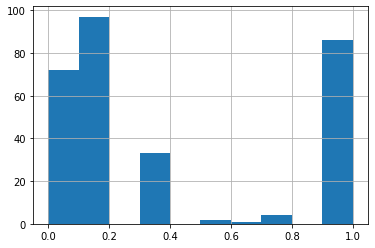

In [ ]:
# возьмем только вторую колонку
pd.Series(y_predicted_prob[:,1]).hist()

In [ ]:
# максимизация precision ( в класс выживших отправлять тех, у кого вероятность >0.8)

In [ ]:
import numpy as np

In [ ]:
y_pred = np.where(y_predicted_prob[:,1] > 0.3 , 1 ,0)

In [ ]:
precision_score(y_test,y_pred)

0.7619047619047619

In [ ]:
recall_score(y_test,y_pred)

0.8

In [ ]:
# нахождение баланса между precision и recall

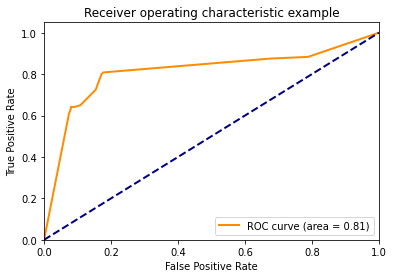

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# true positive - recall
# как часто пассажиров которые не выжили классифицировали как выживших